In [5]:
%matplotlib inline
import tensorflow as tf
import sys
import numpy as np
sys.path.append("..") 
import d2lzh_tensorflow2 as d2l

features, labels = d2l.get_data_ch7()

def init_adam_states():
    v_w, v_b = np.zeros((features.shape[1], 1), dtype=float), np.zeros(1, dtype=float)
    s_w, s_b = np.zeros((features.shape[1], 1), dtype=float), np.zeros(1, dtype=float)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams, grads):
    beta1, beta2, eps, i = 0.9, 0.999, 1e-6, 0
    for p, (v, s) in zip(params, states):
        v[:] = beta1 * v + (1 - beta1) * grads[i]
        s[:] = beta2 * s + (1 - beta2) * grads[i]**2
        v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
        s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
        p.assign_sub(hyperparams['lr']*v_bias_corr/(np.sqrt(s_bias_corr) + eps))
        i+=1
    hyperparams['t'] += 1

loss: 0.248055, 1.312482 sec per epoch


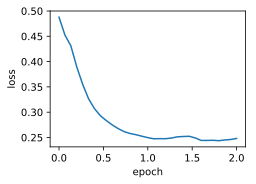

In [6]:
d2l.train_ch7(adam, init_adam_states(), {'lr': 0.01, 't': 1}, features,labels)

In [9]:
from tensorflow import keras
trainer = keras.optimizers.Adam(learning_rate=0.01)

loss: 0.495050, 1.458879 sec per epoch


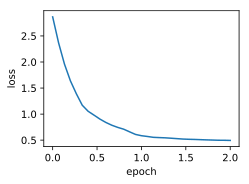

In [10]:
d2l.train_tensorflow2_ch7(trainer, {'learning_rate': 0.01}, features, labels)